In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import networkx as nx

In [8]:
# Create a Erdos-Renyi random network 
G = nx.fast_gnp_random_graph(1000, 0.3, seed=42, directed=False)

# Calculate the average degree of the network
avg_degree = np.mean([G.degree(n) for n in G.nodes()])

In [9]:
# Define the parameters

beta_b = 0.1
beta_w = 0.1
gamma_0 = 0.01
gamma_p = 0
epsilon = 0.3
epsilon_b = 0.1
mu_b = 0.6 
mu = 0.7 

In [10]:
# Define the system of ODEs
def system(y, t, p):
    # Define compartments
    V, B, C, W, C_b, W_b, P = y
    # Total population
    N = sum(y)
    # Total b infected 
    B_t = B + C_b + W_b
    # Total w infected
    W_t = W + W_b + C_b


    # First equation 
    dV = -p['beta_b']*V*B_t/N - p['beta_w']*V*W_t/N - p['gamma_0']*V
    # Second equation 
    dB = p['beta_b']*V*B_t/N - p['beta_w']*B*W_t/N - p['gamma_0']*B 
    # Third equation   
    dC = p['beta_w']*V*W_t/N - p['beta_b']*C*B_t/N - p['epsilon']*C - p['gamma_p']*C
    # Fourth equation
    dW = p['epsilon']*C - p['beta_b']*W*B_t/N - p['mu']*W - p['gamma_p']*W
    # Fifth equation
    dC_b = p['beta_w']*B*W_t/N - p['beta_b']*W*B_t/N - p['gamma_p']*B*C - p['epsilon_b']*C_b
    # Sixth equation
    dW_b = p['beta_b']*W*B_t/N + p['epsilon_b']*C_b - p['gamma_p']*B*W - p['mu_b']*W_b
    # Seventh equation
    dP = p['gamma_0']*(V + B) + p['gamma_p']*(C + W + C_b + W_b) + p['mu']*(W) + p['mu_b']*W_b

    # Return array 
    return [dV, dB, dC, dW, dC_b, dW_b, dP]



In [11]:
# Initial conditions
V0 = 235
B0 = 14
C0 = 3
W0 = 14
C_b0 = 0
W_b0 = 0
P0 = 0


y0 = [V0, B0, C0, W0, C_b0, W_b0, P0]

# Time vector
t = np.linspace(0, 109, 109000)

# Parameters
p = {'beta_b': beta_b, 'beta_w': beta_w, 'gamma_0': gamma_0, 'gamma_p': gamma_p, 'epsilon': epsilon,
      'epsilon_b': epsilon_b, 'mu_b': mu_b, 'mu': mu}

# Integrate the system of ODEs
result = odeint(system, y0, t, args=(p,))

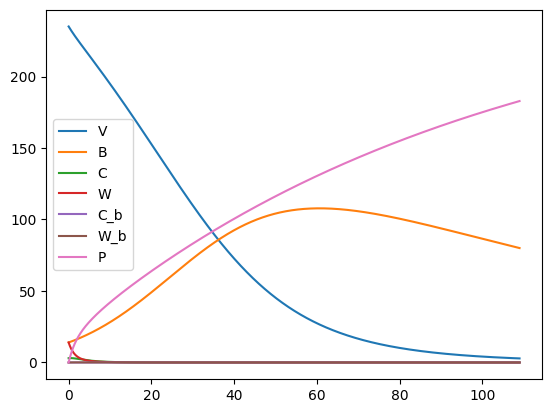

In [12]:
# Plot the results
plt.plot(t, result)
plt.legend(['V', 'B', 'C', 'W', 'C_b', 'W_b', 'P'])
plt.show()